### 4. Сверточные нейронные сети

#### Задание:
Используя файл Web4.ipynb (он в полезных ссылках):

Попробуйте улучшить точность распознавания образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложите анализ с описанием того, что улучшает работу нейронной сети, а что ухудшает
Опишите в анализе, какие изменения необходимо было бы внести в получившуюся нейронную сеть, если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

import os

In [2]:
tf.random.set_seed(1)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
results = pd.DataFrame() # сводная таблица результатов
step = [] # шаг
desc = [] # описание
train_acc = [] # результат на трейне
test_acc = [] # результат на тесте

#### Подготовка датасета и разбиение на тестовую и валидационнуй выборку

In [6]:
# установка параметров нейросети
batch_size = 64
num_classes = 10
epochs = 10

# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


X_train = X_train / 255.0
X_test = X_test / 255.0

170498071/170498071 [==============================] - 1021s 6us/step
X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [7]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

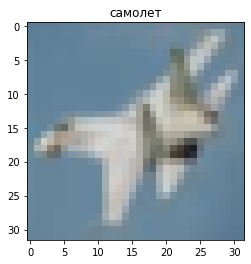

In [8]:
N = 10 #пример картинки объекта исследования

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

#### Повышение точности распознавания образов cifar 10 сверточной нейронной сетью

In [9]:
# конфигурирование слоев нейросети
model_1 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_1.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_1.add(GlobalAveragePooling2D())
model_1.add(Dense(64))
model_1.add(Activation('relu'))
model_1.add(Dense(32))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()
# компиляция модели
model_1.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [10]:
#Обучение модели
history_1 = model_1.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 163s 203ms/step - loss: 1.9450 - accuracy: 0.2439 - val_loss: 1.6844 - val_accuracy: 0.3406
Epoch 2/10
782/782 [==============================] - 158s 202ms/step - loss: 1.6719 - accuracy: 0.3548 - val_loss: 1.4889 - val_accuracy: 0.4348
Epoch 3/10
782/782 [==============================] - 158s 202ms/step - loss: 1.5524 - accuracy: 0.4214 - val_loss: 1.3694 - val_accuracy: 0.4887
Epoch 4/10
782/782 [==============================] - 162s 207ms/step - loss: 1.4539 - accuracy: 0.4716 - val_loss: 1.2693 - val_accuracy: 0.5230
Epoch 5/10
782/782 [==============================] - 162s 207ms/step - loss: 1.3834 - accuracy: 0.5030 - val_loss: 1.2321 - val_accuracy: 0.5490
Epoch 6/10
782/782 [==============================] - 163s 208ms/step - loss: 1.3289 - accuracy: 0.5252 - val_loss: 1.1636 - val_accuracy: 0.5761
Epoch 7/10
782/782 [==============================] - 165s 211ms/step - loss: 1.2829 - accuracy: 0.5475 - val_loss: 1.0918 -

#### Посмотим метрики на тренировочном и валидационном сете

In [44]:

train_loss, train_m = model_1.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_1.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(1)
desc.append('Базовая модель')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 29s - loss: 0.9574 - accuracy: 0.6573 - 29s/epoch - 19ms/step
313/313 - 6s - loss: 1.0001 - accuracy: 0.6416 - 6s/epoch - 18ms/step
train_loss: 0.9573948383331299, train_accuracy: 0.6572800278663635
test_loss: 1.0000710487365723, test_accuracy: 0.6416000127792358


1/1 [==============================] - 0s 54ms/step


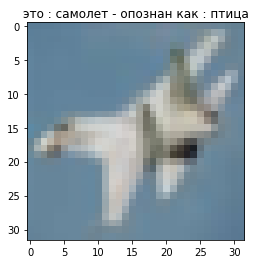

In [15]:
#Наше пробное предсказание
N = 10
y_p = model_1.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

Как мы можем убедиться, на тестовой выборке у модели произошло переобучение, ввиду чего предсказание было ошибочно, хотя и близкое по симантическому смыслу.

1/1 [==============================] - 0s 59ms/step


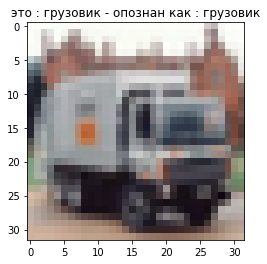

In [16]:
N = 11
y_p = model_1.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

1/1 [==============================] - 0s 59ms/step


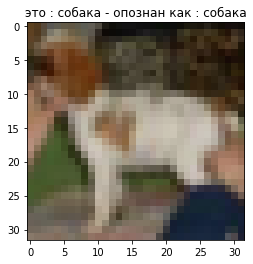

In [17]:
N = 12
y_p = model_1.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

Два последующих примера объектов были распознаны правильно.

#### Проверим точность при увеличении ширины сети (больше фильтров)

In [18]:
# конфигурирование слоев нейросети
model_2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_2.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(256, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_2.add(GlobalAveragePooling2D())
model_2.add(Dense(64))
model_2.add(Activation('relu'))
model_2.add(Dense(32))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()
# компиляция модели
model_2.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 activation_8 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 64)        0         
                                                      

In [19]:
#Тренируем модель
history_2 = model_2.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 456s 579ms/step - loss: 1.9051 - accuracy: 0.2557 - val_loss: 1.6521 - val_accuracy: 0.3633
Epoch 2/10
782/782 [==============================] - 448s 573ms/step - loss: 1.6124 - accuracy: 0.3907 - val_loss: 1.4149 - val_accuracy: 0.4776
Epoch 3/10
782/782 [==============================] - 364s 465ms/step - loss: 1.4365 - accuracy: 0.4778 - val_loss: 1.2580 - val_accuracy: 0.5353
Epoch 4/10
782/782 [==============================] - 235s 300ms/step - loss: 1.3306 - accuracy: 0.5239 - val_loss: 1.1652 - val_accuracy: 0.5726
Epoch 5/10
782/782 [==============================] - 221s 283ms/step - loss: 1.2361 - accuracy: 0.5649 - val_loss: 1.1019 - val_accuracy: 0.6023
Epoch 6/10
782/782 [==============================] - 230s 294ms/step - loss: 1.1551 - accuracy: 0.5922 - val_loss: 0.9635 - val_accuracy: 0.6565
Epoch 7/10
782/782 [==============================] - 222s 283ms/step - loss: 1.0885 - accuracy: 0.6197 - val_loss: 0.9609 -

In [45]:
#Посмотим метрики на тренировочном и валидационном сете

train_loss, train_m = model_2.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_2.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(2)
desc.append('Шире - больше каналов')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 56s - loss: 0.7279 - accuracy: 0.7406 - 56s/epoch - 36ms/step
313/313 - 11s - loss: 0.8276 - accuracy: 0.7045 - 11s/epoch - 37ms/step
train_loss: 0.7279402613639832, train_accuracy: 0.7406399846076965
test_loss: 0.8275877833366394, test_accuracy: 0.7045000195503235


1/1 [==============================] - 0s 72ms/step


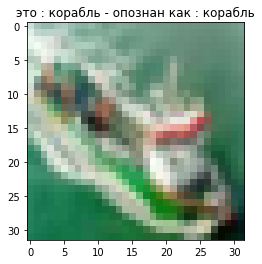

In [21]:
#предсказание модели измененного размера
N = 15
y_p = model_2.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

1/1 [==============================] - 0s 20ms/step


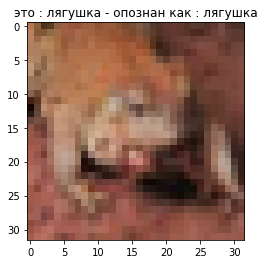

In [24]:
N = 5
y_p = model_2.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

Итак, с увеличением количества фильтров мы получаем выше качество (до 75% на тренировке и 70% на тесте) и меньше ошибку. Предсказания точнее, однако есть возможности для улучшения действующей модели... 

#### Проверим точность при увеличении глубины сети (больше слоев)

In [25]:
# конфигурирование слоев нейросети
model_3 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_3.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))


# полносвязные слои нейронной сети
model_3.add(GlobalAveragePooling2D())
model_3.add(Dense(64))
model_3.add(Activation('relu'))
model_3.add(Dense(32))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()
# компиляция модели
model_3.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_14 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_15 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [26]:
#обучаем
history_3 = model_3.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))   

Epoch 1/10
782/782 [==============================] - 94s 118ms/step - loss: 1.9192 - accuracy: 0.2576 - val_loss: 1.6252 - val_accuracy: 0.3847
Epoch 2/10
782/782 [==============================] - 88s 113ms/step - loss: 1.5782 - accuracy: 0.4141 - val_loss: 1.3523 - val_accuracy: 0.5070
Epoch 3/10
782/782 [==============================] - 93s 119ms/step - loss: 1.3883 - accuracy: 0.5061 - val_loss: 1.1685 - val_accuracy: 0.5736
Epoch 4/10
782/782 [==============================] - 87s 111ms/step - loss: 1.2555 - accuracy: 0.5602 - val_loss: 1.0815 - val_accuracy: 0.6087
Epoch 5/10
782/782 [==============================] - 87s 112ms/step - loss: 1.1686 - accuracy: 0.5947 - val_loss: 1.0334 - val_accuracy: 0.6329
Epoch 6/10
782/782 [==============================] - 87s 111ms/step - loss: 1.1035 - accuracy: 0.6196 - val_loss: 0.9260 - val_accuracy: 0.6721
Epoch 7/10
782/782 [==============================] - 86s 110ms/step - loss: 1.0463 - accuracy: 0.6428 - val_loss: 0.9134 - val_ac

In [46]:
# смотрим метрики

train_loss, train_m = model_3.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_3.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(3)
desc.append('Глубже - больше слоев')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

1563/1563 - 36s - loss: 0.7113 - accuracy: 0.7450 - 36s/epoch - 23ms/step
313/313 - 7s - loss: 0.8180 - accuracy: 0.7153 - 7s/epoch - 23ms/step
train_loss: 0.7112600207328796, train_accuracy: 0.7450000047683716
test_loss: 0.8180299401283264, test_accuracy: 0.7153000235557556


1/1 [==============================] - 0s 114ms/step


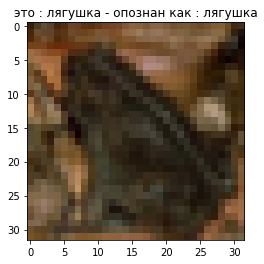

In [28]:
#предсказание
N = 30
y_p = model_3.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

1/1 [==============================] - 0s 34ms/step


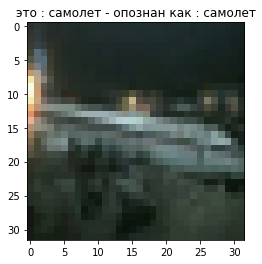

In [30]:
N = 1001
y_p = model_3.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

Метрики похожи на показатели предыдущей одели: на трейне - 74%, на тесте - 70%. Качество не плохое, предсказания выдает.

#### Полносвязная сеть для этой выборки

In [31]:
# конфигурирование слоев нейросети
model_4 = Sequential()

# полносвязные слои нейронной сети
model_4.add(Flatten(input_shape=X_train.shape[1:]))
model_4.add(Dense(512))
model_4.add(Activation('relu'))
model_4.add(Dense(256))
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))

model_4.summary()
# компиляция модели
model_4.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               1573376   
                                                                 
 activation_23 (Activation)  (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 activation_24 (Activation)  (None, 256)               0         
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)               

In [32]:
#обучение
history_4 = model_4.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 17s 21ms/step - loss: 1.9863 - accuracy: 0.2731 - val_loss: 1.7695 - val_accuracy: 0.3719
Epoch 2/10
782/782 [==============================] - 16s 21ms/step - loss: 1.7761 - accuracy: 0.3629 - val_loss: 1.6919 - val_accuracy: 0.3966
Epoch 3/10
782/782 [==============================] - 17s 22ms/step - loss: 1.7128 - accuracy: 0.3901 - val_loss: 1.6275 - val_accuracy: 0.4269
Epoch 4/10
782/782 [==============================] - 17s 22ms/step - loss: 1.6616 - accuracy: 0.4090 - val_loss: 1.6203 - val_accuracy: 0.4191
Epoch 5/10
782/782 [==============================] - 17s 22ms/step - loss: 1.6197 - accuracy: 0.4224 - val_loss: 1.5695 - val_accuracy: 0.4414
Epoch 6/10
782/782 [==============================] - 17s 22ms/step - loss: 1.5945 - accuracy: 0.4323 - val_loss: 1.5322 - val_accuracy: 0.4572
Epoch 7/10
782/782 [==============================] - 17s 22ms/step - loss: 1.5696 - accuracy: 0.4413 - val_loss: 1.5443 - val_accuracy:

In [47]:
#печатаем метрики

train_loss, train_m = model_4.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_4.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(4)
desc.append('Полносвязная сеть')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

1563/1563 - 8s - loss: 1.4344 - accuracy: 0.4877 - 8s/epoch - 5ms/step
313/313 - 2s - loss: 1.4998 - accuracy: 0.4656 - 2s/epoch - 5ms/step
train_loss: 1.434403419494629, train_accuracy: 0.4876599907875061
test_loss: 1.4997899532318115, test_accuracy: 0.46560001373291016


1/1 [==============================] - 0s 35ms/step


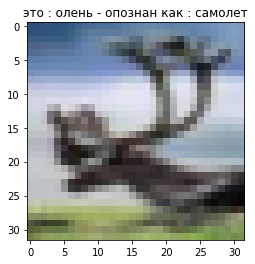

In [48]:
#предсказание
N = 40
y_p = model_4.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

In [63]:
#results['step'] = step
#results['desc'] = desc
#results['train_acc'] = train_acc
#results['test_acc'] = test_acc

In [62]:
results

,step,desc,train_acc,test_acc,model_time_fit
0,1,Базовая модель,0.66,0.64,Базовая модель
1,2,Шире - больше каналов,0.74,0.70,Шире - больше каналов
2,3,Глубже - больше слоев,0.75,0.72,Глубже - больше слоев
3,4,Полносвязная сеть,0.49,0.47,Полносвязная сеть


### Выводы:

1. увеличение количества фильтров, т.е. увеличение итогового количества признаков, увеличило значение метрики. Эта же модель оказалась самой медленной;<br>
2. увеличение глубины сети с увеличением на треть количества слоев увеличило метрику качества и показало самый лучший результат, однако такая модель работает почти в 3,5 раза быстрее, чем "широкая";<br>
3. полносвязная сеть без сверточных слоев показывает самое низкое качество и она же является самой быстрой. Таким образом сверточные слои играют важную роль в обработке.<br>
4. хочется отметить, что все последовательные изменения значительно сказались на скорости обучения сеток. Базовая модель model_1 потратила примерно 26 минут, model_2 - 47 мин., model_3 - 14 мин., model_4 - 2,8 мин.

Итоговый вывод такой: для каждого набора данных нужно выбирать те методы, которые соответствуют характеру представления этих данных. Для маленьких полноцветных картинок нашего датасета лучше подошла глубокая модель с большим на треть количеством сверточных слоев, она же стала самой быстрой из результативных. Так как "полносвязную" модель в чистом виде без прослойки сверточных слоев, из-за плохого качества использовать невозможно, то учитывая стоимость обучения, лучшей признается model_3 ("глубокая") на данном этапе.